**Import the necessary Python libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the Dataset**

In [ ]:
df = pd.read_csv('/content/Indian Airlines.csv')
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 12)

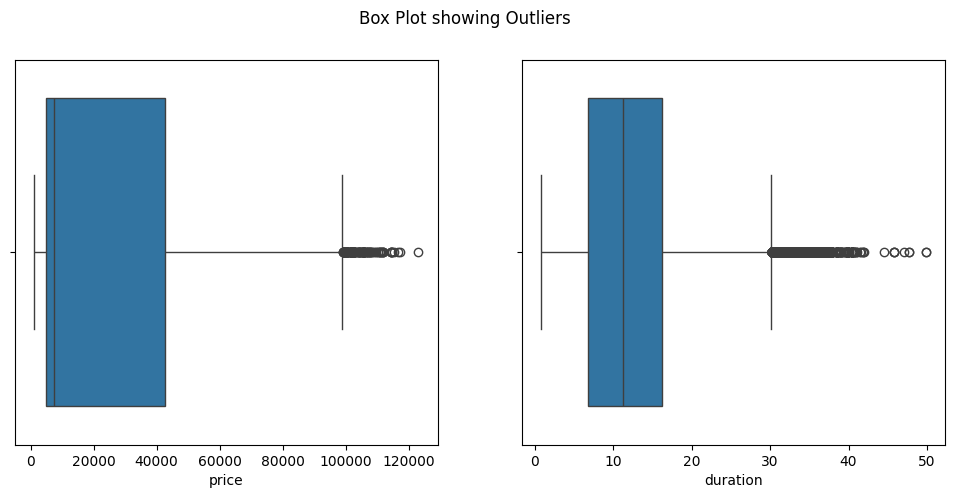

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,5))                                  # As we can see there are outliers, we have to remove them from both of the Columns.
sns.boxplot(x = 'price', data = df, ax = axes[0])
sns.boxplot(x = 'duration', data = df, ax = axes[1])
plt.suptitle('Box Plot showing Outliers')
plt.show()

## **But I checked that removing the rows also removes Business Category from Class Column. So I decided not to remove them.**

In [ ]:
df.isnull().sum()                                                                # No null values present so the data is clean and structured

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#**Exploratory Data Analysis**

1. What are number of flights operated by each airline?

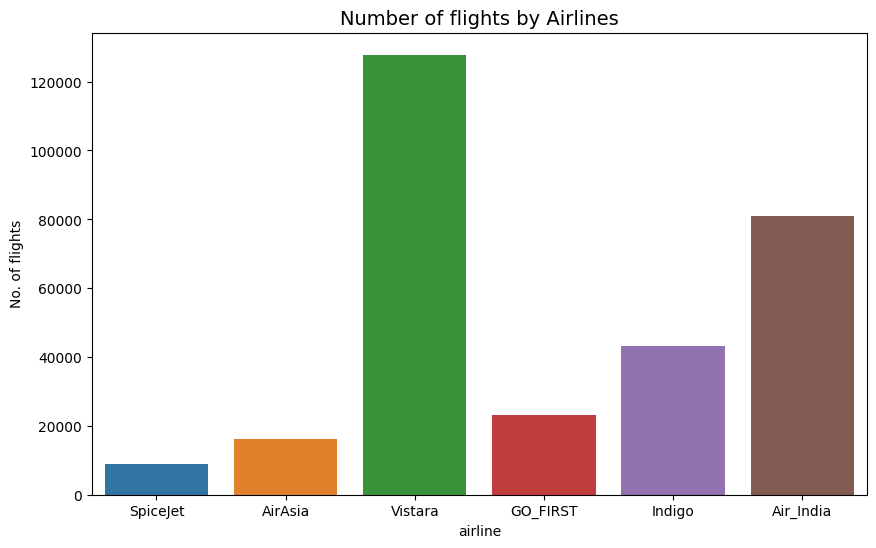

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'airline', hue = 'airline')
plt.title('Number of flights by Airlines', fontsize = 14)
plt.ylabel('No. of flights')
plt.show()

**From the above figure, we can see 'Vistara' has maximum no. of fights followed by 'Air India' while 'Spice Jet' has least no. of flights.**

2. What is availability of Tickets according to class of travel?

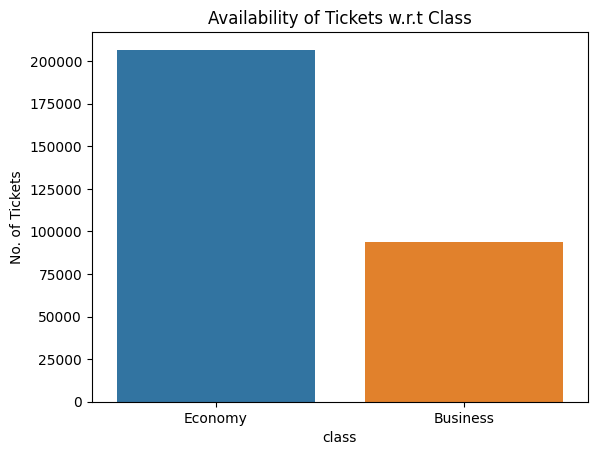

In [ ]:
sns.countplot(data = df, x = 'class', hue = 'class')
plt.title('Availability of Tickets w.r.t Class')
plt.ylabel('No. of Tickets')
plt.show()


The picture shows that there are nearly twice as many 'Economy' tickets available compared to **'Business'** class tickets. This is because only two airlines, **'Air India' and 'Vistara'**, offer 'Business' class tickets, while all airlines offer **'Economy'** class tickets.

3. What is price range according to class of travel?

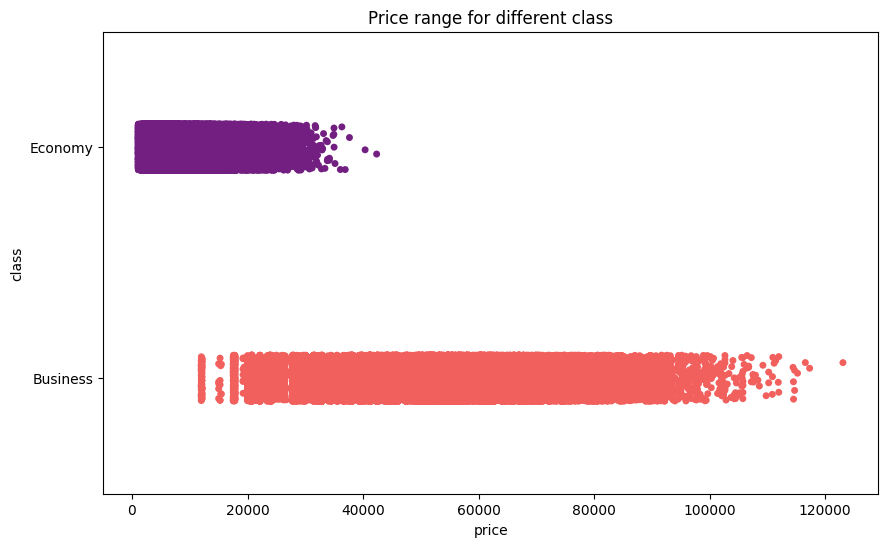

In [ ]:
plt.figure(figsize = (10,6))
sns.stripplot(data = df, x = 'price', y = 'class', hue = 'class', palette = 'magma')
plt.title('Price range for different class', fontsize = 12)
plt.show()

From the above figure, we can see 'Economy' class tickets usually cost between **2500 - 22500** while 'Business' class tickets usually cost between **25000 - 96000.**

4. What is price of ticket for different airlines based on duration of flight?

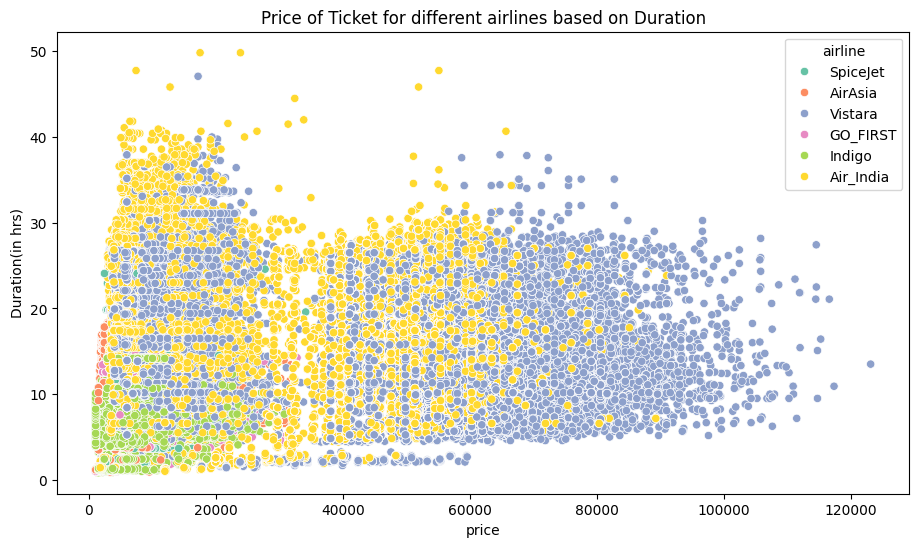

In [ ]:
plt.figure(figsize = (11,6))
sns.scatterplot(data = df, x = 'price', y = 'duration', hue = 'airline', palette = 'Set2')
plt.title('Price of Ticket for different airlines based on Duration')
plt.ylabel('Duration(in hrs)')
plt.show()

From the above figure, we see the distribution of ticket price varying with duration of flight. More no. of **blue and yellow** points in the figure is explained by the fact that **'Vistara' and 'Air India'** have maximum no. of flights.

5. How do ticket prices vary across different airlines and class of travel?

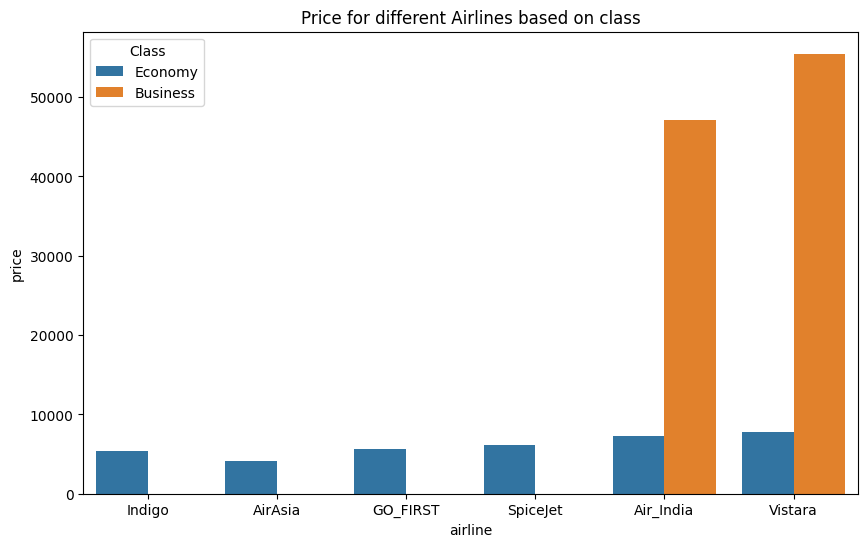

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df.sort_values('price'), x = 'airline', y = 'price', hue = 'class', errorbar = None)       # I sorted the data to asc to desc for a better graph
plt.legend(title = 'Class', loc = 'upper left')
plt.title('Price for different Airlines based on class')
plt.show()

From the chart, we can see that 'Air Asia' has the lowest prices for 'Economy' class tickets, while 'Indigo', 'Go First', and 'Spice Jet' are all priced similarly. On the other hand, 'Air India' and 'Vistara' have much higher prices compared to the other four airlines. This difference can be explained by the fact that 'Air India' and 'Vistara' are full-service carriers (FSCs), while the rest are low-cost carriers (LCCs). Additionally, for 'Business' class tickets, 'Vistara' charges much more than 'Air India', possibly because of better service and higher quality seats available on 'Vistara' compared to 'Air India'.

6. How do airline ticket prices vary depending on when you buy them?

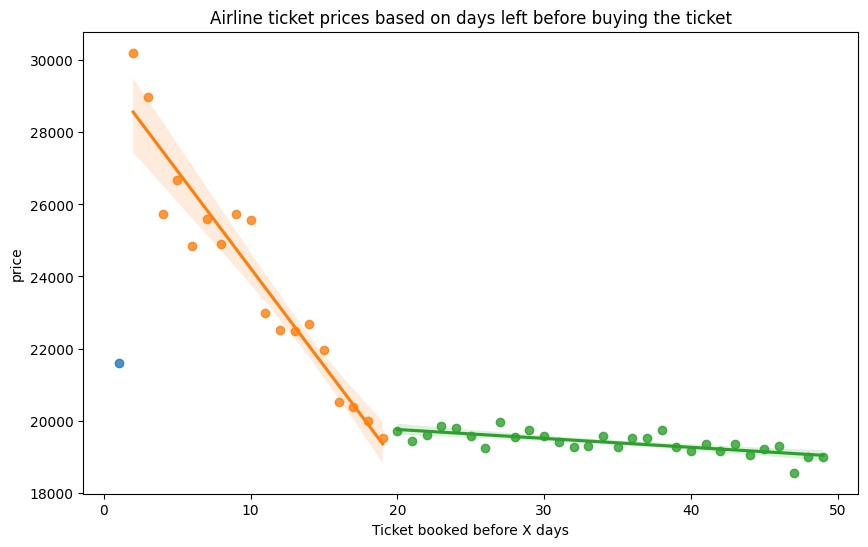

In [ ]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize = (10,6))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
plt.title('Airline ticket prices based on days left before buying the ticket')
plt.xlabel('Ticket booked before X days')
plt.show()

From the above figure, we can conclude that ticket price rise slowly till 20 days from the date of flight, then rise sharply till the last day, while dramatically reducing just 1 day before the date of flight. This can be explained by the fact that people usually buy flight tickets within 2-3 weeks of flight which generates more profits for airlines. On last day, prices show dramatic reduction as airlines hope to fill the flight completely due to increase the load factor and decrease the operational cost per passenger.

7. How does price of ticket vary depending on duration of flight?

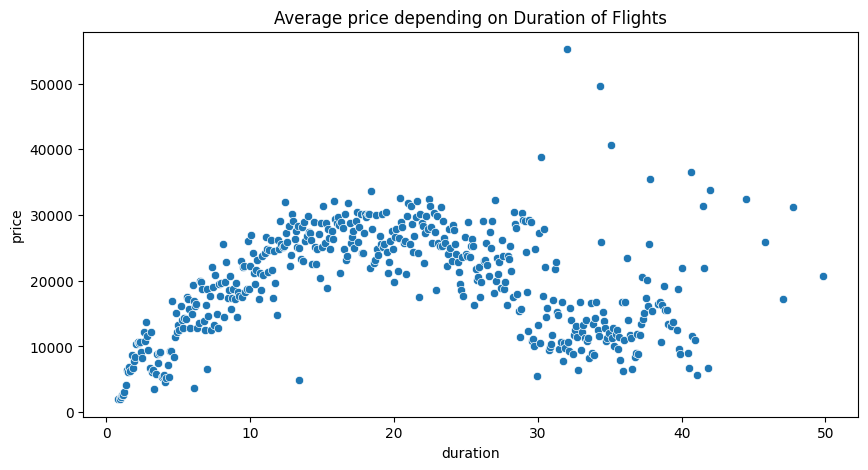

In [ ]:
df_ticket = df.groupby('duration')['price'].mean().reset_index()
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'duration', y = 'price', data = df_ticket)
plt.title('Average price depending on Duration of Flights')
plt.show()

From the above figure, we can see that the relationship is not linear and showing a curve type scatterplot. We can see linear growth in prices as duration of flight increases till **20** and then lowering again. Some Outliers are also there as mentioned above.

8. How does ticket price vary according to departure time and arrival time?

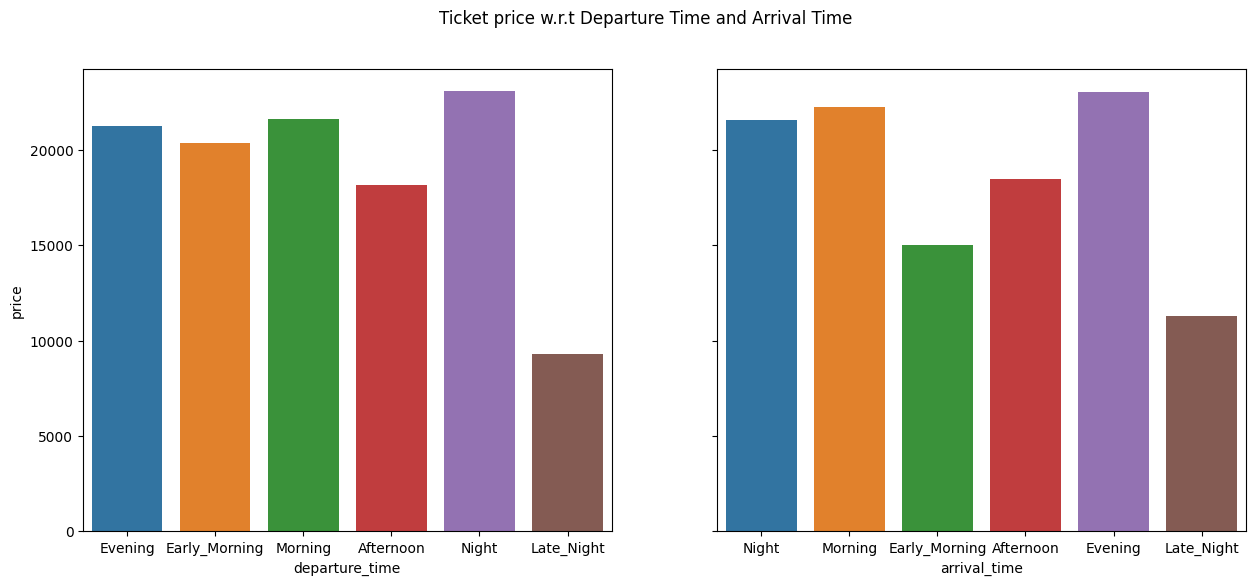

In [ ]:
fig, axes = plt.subplots(1,2, sharey = True, figsize = (15,6))
sns.barplot(x = 'departure_time', y = 'price', data = df, hue = 'departure_time', errorbar = None, ax = axes[0])
sns.barplot(x = 'arrival_time', y = 'price', data = df, hue = 'arrival_time', errorbar = None, ax = axes[1])
plt.suptitle('Ticket price w.r.t Departure Time and Arrival Time')
plt.show()

From the above figure, we can conclude that flights departing late at night are cheapest while those arriving early morning and late night are cheap too. Flights departung in afternoon are relatively cheap as well.

9. How does ticket price vary depending on source and destination?

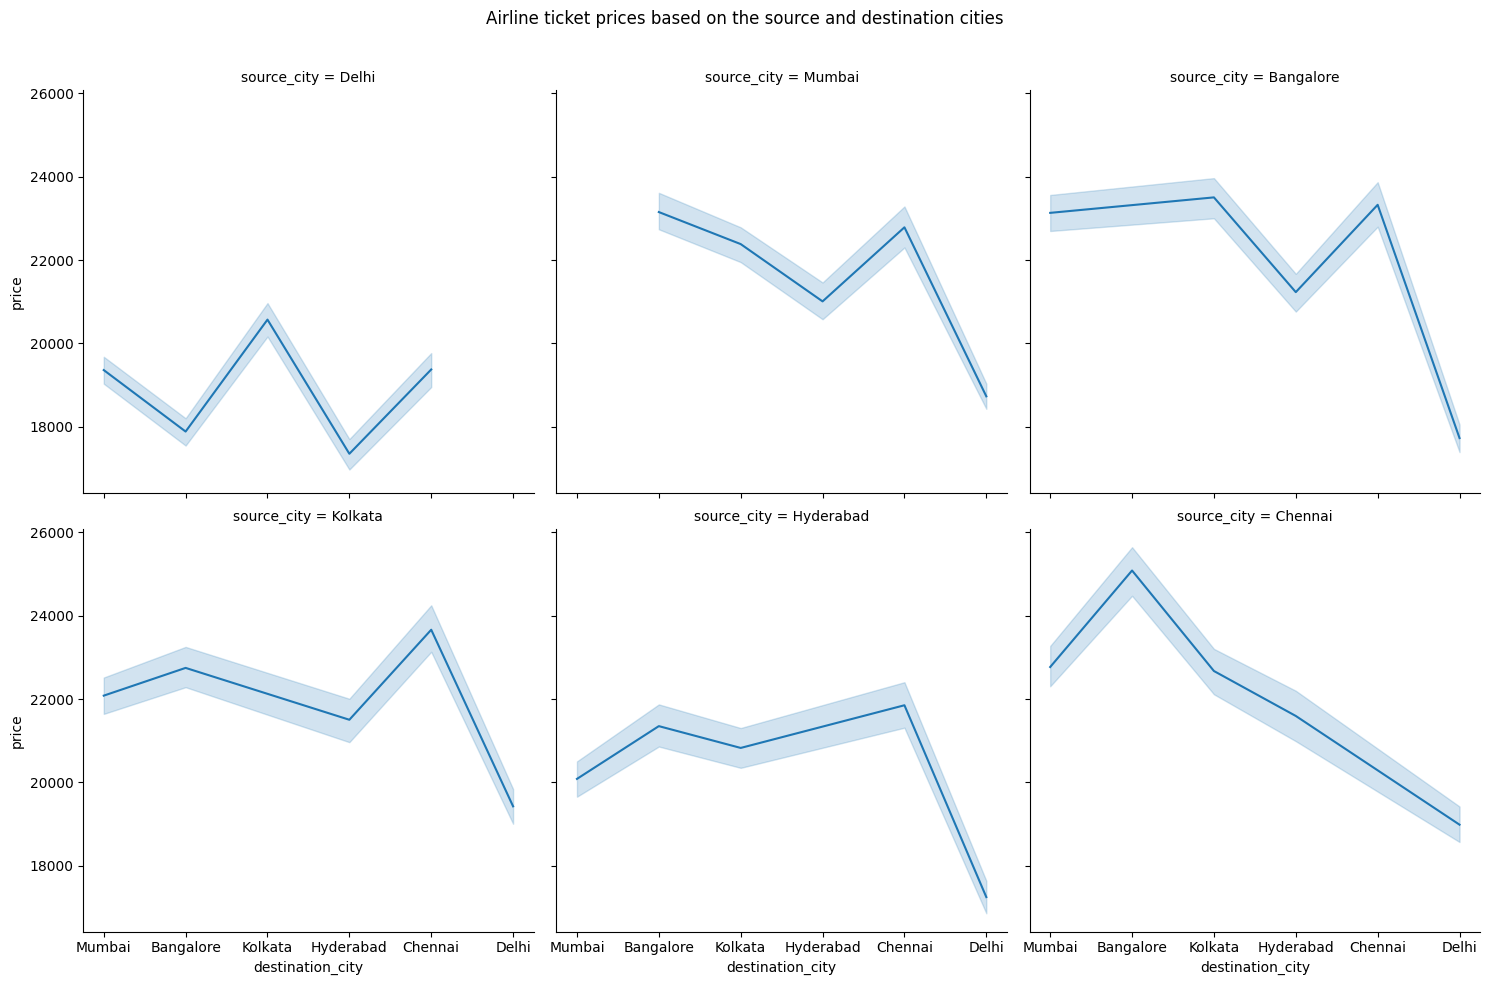

In [ ]:
ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)

From the above figure, we can conclude that flight departing from Delhi are usually cheaper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of freqencies resulting in cheaper ticket prices. Chennai-Bangalore seems to be the most expensive route to fly while Hyderabad is most expensive city to fly.

10. How does price of tickets vary based on no. of stops and airline?

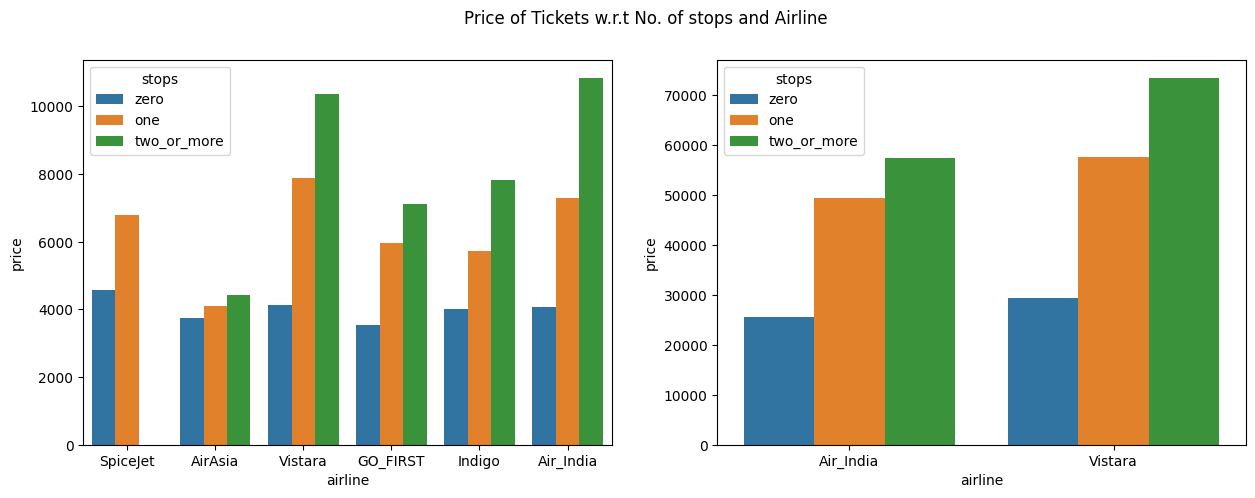

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(x = 'airline', y = 'price', hue = 'stops', data = df.loc[df['class'] == 'Economy'], errorbar = None, ax = axes[0])
sns.barplot(x = 'airline', y = 'price', hue = 'stops', data = df.loc[df['class'] == 'Business'], errorbar = None, ax = axes[1])
plt.suptitle('Price of Tickets w.r.t No. of stops and Airline')
plt.show()